In [1]:
# from pyspark.sql import SparkSession

In [2]:
# spark = SparkSession.builder \
#         .appName("SparkSample") \
#         .getOrCreate() # .master("spark://localhost:8088")

In [3]:
# data_raw = spark.read.options(delimiter=";", header=True, encoding="latin1", dateFormat="dd/MM/yyyy", inferSchema=True).csv("/user/ivan/input/bweb.csv")
# data_raw.show(5)

## 2. Exploração Inicial dos Dados:

<ul>
    <li>Baixar e carregar os dados para o HDFS no cluster. </li>
    <li>Realizar uma exploração inicial dos dados, utilizando operações sobre DataFrames, como show(), count(), describe(), entre outras.</li>
    <li>Identificar a estrutura dos registros, os tipos de dados presentes, entre outras informações relevantes</li>
</ul>

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
## Baixar e carregar os dados para o HDFS no cluster.
data_raw = pd.read_csv("Data/bweb_csv.zip", encoding = "latin1", sep = ";", low_memory=False)
data_raw.head(3).T

,0,1,2
DT_GERACAO,05/10/2022,05/10/2022,05/10/2022
HH_GERACAO,15:19:40,15:19:40,15:19:40
ANO_ELEICAO,2022,2022,2022
CD_TIPO_ELEICAO,0,0,0
NM_TIPO_ELEICAO,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária
CD_PLEITO,406,406,406
DT_PLEITO,02/10/2022,02/10/2022,02/10/2022
NR_TURNO,1,1,1
CD_ELEICAO,544,544,544
DS_ELEICAO,Eleição Geral Federal 2022,Eleição Geral Federal 2022,Eleição Geral Federal 2022


In [63]:
## Realizar uma exploração inicial dos dados, utilizando operações sobre DataFrames, como show(), count(), describe(), entre outras
# data.show()
display(data_raw.head(5))
# data.count()
print(data_raw.shape)
# data.describe()
data_raw.describe()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,...,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,05/10/2022,15:19:40,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,1941091E,21/09/2022 10:11:00,1 - 1,#NULO#,02/10/2022 08:00:01,02/10/2022 17:01:01,11,02/10/2022 17:02:42,-1,-1
1,05/10/2022,15:19:40,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,1941091E,21/09/2022 10:11:00,1 - 1,#NULO#,02/10/2022 08:00:01,02/10/2022 17:01:01,11,02/10/2022 17:02:42,-1,-1
2,05/10/2022,15:19:40,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,1941091E,21/09/2022 10:11:00,1 - 1,#NULO#,02/10/2022 08:00:01,02/10/2022 17:01:01,11,02/10/2022 17:02:42,-1,-1
3,05/10/2022,15:19:40,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,1941091E,21/09/2022 10:11:00,1 - 1,#NULO#,02/10/2022 08:00:01,02/10/2022 17:01:01,11,02/10/2022 17:02:42,-1,-1
4,05/10/2022,15:19:40,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,1941091E,21/09/2022 10:11:00,1 - 1,#NULO#,02/10/2022 08:00:01,02/10/2022 17:01:01,11,02/10/2022 17:02:42,-1,-1


(878328, 45)


,ANO_ELEICAO,CD_TIPO_ELEICAO,CD_PLEITO,NR_TURNO,CD_ELEICAO,CD_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,...,QT_ABSTENCOES,CD_TIPO_URNA,CD_TIPO_VOTAVEL,NR_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,QT_ELEITORES_BIOMETRIA_NH,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
count,878328.0,878328.0,878328.0,878328.0,878328.000000,878328.000000,878328.000000,878328.000000,878328.000000,878328.000000,...,878328.000000,878328.0,878328.000000,878328.000000,878328.000000,8.783280e+05,878328.000000,878328.000000,878328.000000,878328.000000
mean,2022.0,0.0,406.0,1.0,545.879756,17532.105076,28.178827,162.478821,1351.646847,5.901308,...,64.042337,1.0,1.450008,15883.713591,11.883365,1.786512e+06,492.635534,29.696354,-0.999863,-0.999863
std,0.0,0.0,0.0,0.0,0.475426,1209.665579,21.983483,152.321064,399.862550,1.594414,...,22.814167,0.0,0.987020,22286.202235,27.360338,3.798083e+05,287.561117,22.903778,0.016530,0.016530
min,2022.0,0.0,406.0,1.0,544.000000,16004.000000,1.000000,1.000000,1015.000000,1.000000,...,4.000000,1.0,1.000000,10.000000,1.000000,1.001137e+06,0.002000,0.000000,-1.000000,-1.000000
25%,2022.0,0.0,406.0,1.0,546.000000,16993.000000,6.000000,47.000000,1058.000000,6.000000,...,48.000000,1.0,1.000000,96.000000,1.000000,1.309746e+06,247.103000,14.000000,-1.000000,-1.000000
50%,2022.0,0.0,406.0,1.0,546.000000,17612.000000,26.000000,102.000000,1163.000000,6.000000,...,61.000000,1.0,1.000000,4000.000000,2.000000,2.051990e+06,487.233000,21.000000,-1.000000,-1.000000
75%,2022.0,0.0,406.0,1.0,546.000000,17795.000000,49.000000,243.000000,1554.000000,7.000000,...,77.000000,1.0,1.000000,28123.000000,8.000000,2.059203e+06,738.946000,41.000000,-1.000000,-1.000000
max,2022.0,0.0,406.0,1.0,546.000000,30031.000000,69.000000,630.000000,2577.000000,7.000000,...,182.000000,1.0,4.000000,80180.000000,335.000000,2.246822e+06,999.976000,314.000000,1.000000,1.000000


In [64]:
## Identificar a estrutura dos registros, os tipos de dados presentes, entre outras informações relevantes
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878328 entries, 0 to 878327
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DT_GERACAO                   878328 non-null  object 
 1   HH_GERACAO                   878328 non-null  object 
 2   ANO_ELEICAO                  878328 non-null  int64  
 3   CD_TIPO_ELEICAO              878328 non-null  int64  
 4   NM_TIPO_ELEICAO              878328 non-null  object 
 5   CD_PLEITO                    878328 non-null  int64  
 6   DT_PLEITO                    878328 non-null  object 
 7   NR_TURNO                     878328 non-null  int64  
 8   CD_ELEICAO                   878328 non-null  int64  
 9   DS_ELEICAO                   878328 non-null  object 
 10  SG_UF                        878328 non-null  object 
 11  CD_MUNICIPIO                 878328 non-null  int64  
 12  NM_MUNICIPIO                 878328 non-null  object 
 13 

## 3. Limpeza e Transformação dos Dados:

<ul>
    <li>Realizar a limpeza e transformação dos dados, eliminando registros inválidos ou inconsistentes, e convertendo os tipos de dados, se necessário.</li>
    <li>Utilizar as transformações disponíveis em DataFrames, como select(), filter(), withColumn(), etc.</li>
</ul>

In [65]:
## Realizar a limpeza e transformação dos dados, eliminando registros inválidos ou inconsistentes, e convertendo os tipos de dados, se necessário.
# Select date columns 
date_columns = data_raw.columns[data_raw.columns.str.contains("DT_")]

# fix dates
for ii in date_columns:
    data_raw[ii] = pd.to_datetime(data_raw[ii], errors='coerce')
    
# Fix time column
# data_raw["HH_GERACAO"] = data_raw["HH_GERACAO"].dt.strftime("%d-%m-%y %H:%M:%S").str.split(" ", expand=True, ).loc[:, 1]

C:\Users\Ivan\AppData\Local\Temp\ipykernel_9760\4151104434.py:7: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_raw[ii] = pd.to_datetime(data_raw[ii], errors='coerce')


In [66]:
# Identifying missing data
missing_df = pd.DataFrame(data = data_raw.isnull().sum(axis=0), columns=["missing_values"]).sort_values(by="missing_values", ascending=False)
display(missing_df.head())
#data_raw.query("DT_ENCERRAMENTO.isnull() or DT_ABERTURA.isnull()").shape


,missing_values
DT_ENCERRAMENTO,60
DT_ABERTURA,60
DT_GERACAO,0
CD_CARGA_1_URNA_EFETIVADA,0
CD_TIPO_URNA,0


In [67]:
data_df = data_raw.copy()
# Removing missing data
data_df.dropna(axis=0, inplace=True)
# Missing count
print(f"Total of missing values: {data_df.isnull().sum().sum()}")

Total of missing values: 0


In [68]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878268 entries, 0 to 878327
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   DT_GERACAO                   878268 non-null  datetime64[ns]
 1   HH_GERACAO                   878268 non-null  object        
 2   ANO_ELEICAO                  878268 non-null  int64         
 3   CD_TIPO_ELEICAO              878268 non-null  int64         
 4   NM_TIPO_ELEICAO              878268 non-null  object        
 5   CD_PLEITO                    878268 non-null  int64         
 6   DT_PLEITO                    878268 non-null  datetime64[ns]
 7   NR_TURNO                     878268 non-null  int64         
 8   CD_ELEICAO                   878268 non-null  int64         
 9   DS_ELEICAO                   878268 non-null  object        
 10  SG_UF                        878268 non-null  object        
 11  CD_MUNICIPIO                 87

### 4. Análise Exploratória:

Realizar uma análise exploratória dos resultados das eleições, utilizando DataFrames no PySpark:<ul>
    <li>Calcular a taxa de comparecimento às eleições por município, zona eleitoral ou seção eleitoral.</li>
    <li>Identificar os municípios com maior e menor taxa de comparecimento.</li>
    <li>Determinar o desempenho de cada partido, calculando a quantidade de votos recebidos por partido.</li>
    <li>Comparar o desempenho dos partidos em diferentes municípios ou estados.</li>
    <li>Identificar os candidatos mais votados para cada cargo.</li>
    <li>Identificar regiões com maior concentração de votos em determinados partidos ou candidatos.</li>
    <li>Análise da participação eleitoral por faixa etária ou gênero.</li>
    <li>Comparar a proporção de votos brancos e nulos com o total de votos válidos.</li>
    <li>Utilização de funções de agregação, como sum(), avg(), count(), etc., para obter insights estatísticos.</li>
</ul>

In [71]:
## Calcular a taxa de comparecimento às eleições por município, zona eleitoral ou seção eleitoral.
# Create a group and select only the frist row ( qt_aptos and qt_comparecimento are the same for all rows)
data_group = data_df.groupby(["SG_UF", "NM_MUNICIPIO", "NR_ZONA", "NR_SECAO"]).nth(0).copy()
data_group["PROP_COMPARECIMENTO"] = data_group.QT_COMPARECIMENTO / data_group.QT_APTOS 
data_group["PROP_ABSTENCOES"] = data_group.QT_ABSTENCOES / data_group.QT_APTOS 
result = data_group[["SG_UF", "NM_MUNICIPIO", "NR_ZONA", "NR_SECAO", "PROP_COMPARECIMENTO", "PROP_ABSTENCOES"]]
display(result.head(5).style.format({"PROP_COMPARECIMENTO": "{:.2%}", "PROP_ABSTENCOES": "{:.2%}"}))

,SG_UF,NM_MUNICIPIO,NR_ZONA,NR_SECAO,PROP_COMPARECIMENTO,PROP_ABSTENCOES
0,RN,NATAL,1,1,76.60%,23.40%
127,RN,NATAL,1,2,85.46%,14.54%
270,RN,NATAL,1,3,80.66%,19.34%
407,RN,NATAL,1,4,82.32%,17.68%
547,RN,NATAL,1,5,82.77%,17.23%


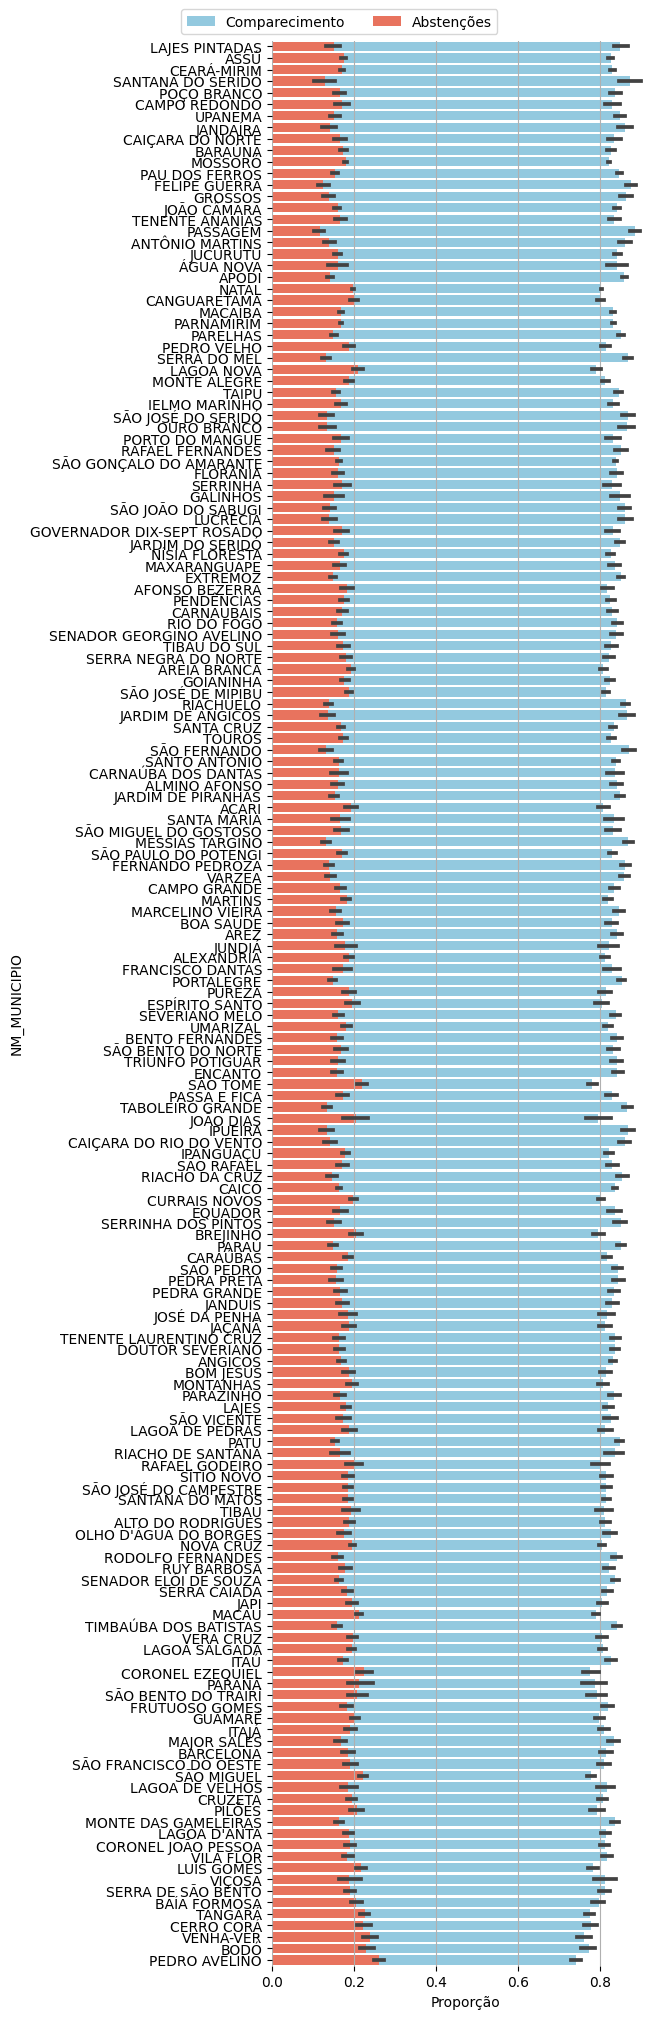

In [122]:
# Temporary ordered df
temp_df = result.sort_values(by="PROP_COMPARECIMENTO", ascending=False)
# Fig
fig, ax = plt.subplots(figsize=(5, 25))
# Plot
sns.barplot(data=temp_df, x="PROP_COMPARECIMENTO", y="NM_MUNICIPIO", color="skyblue", label="Comparecimento", ax=ax)
sns.barplot(data=temp_df, x="PROP_ABSTENCOES", y="NM_MUNICIPIO", color="tomato", label="Abstenções", ax=ax)
# Add a legend and informative axis label
ax.legend(ncol=2, bbox_to_anchor=(0.6, 1.02))
ax.set(xlabel="Proporção")
ax.grid(visible=True, axis="x")
sns.despine(left=True, bottom=True)
plt.show()

In [13]:

## Identificar os municípios com maior e menor taxa de comparecimento.
# Top 5, comparecimento
print("Top 5, comparecimento")
display(data_group[["NM_MUNICIPIO", "PROP_COMPARECIMENTO", "PROP_ABSTENCOES"]].sort_values(by="PROP_COMPARECIMENTO", ascending=False)
        .head(5)
        .style.format({"PROP_COMPARECIMENTO": "{:.2%}", "PROP_ABSTENCOES": "{:.2%}"}))

# Last 5, comparecimento
print("Last 5, comparecimento")
display(data_group[["NM_MUNICIPIO", "PROP_COMPARECIMENTO", "PROP_ABSTENCOES"]].sort_values(by="PROP_COMPARECIMENTO", ascending=True)
        .head(5)
        .style.format({"PROP_COMPARECIMENTO": "{:.2%}", "PROP_ABSTENCOES": "{:.2%}"})
        )


Top 5, comparecimento


,NM_MUNICIPIO,PROP_COMPARECIMENTO,PROP_ABSTENCOES
832913,LAJES PINTADAS,95.24%,4.76%
462427,ASSÚ,95.00%,5.00%
232022,CEARÁ-MIRIM,94.29%,5.71%
420818,SANTANA DO SERIDÓ,94.07%,5.93%
787604,POÇO BRANCO,93.96%,6.04%


Last 5, comparecimento


,NM_MUNICIPIO,PROP_COMPARECIMENTO,PROP_ABSTENCOES
85281,NATAL,58.73%,41.27%
291306,CANGUARETAMA,62.24%,37.76%
603819,PARANÁ,62.76%,37.24%
357983,PEDRO AVELINO,66.27%,33.73%
256834,ESPÍRITO SANTO,66.75%,33.25%


In [14]:
## Determinar o desempenho de cada partido, calculando a quantidade de votos recebidos por partido.
mask = data_df.CD_TIPO_VOTAVEL.isin([1, 4])
data_group = data_df[mask].groupby("SG_PARTIDO")
data_group.DS_TIPO_VOTAVEL.count().reset_index(name="QT_VOTOS").sort_values(by="QT_VOTOS", ascending=False)

,SG_PARTIDO,QT_VOTOS
9,PL,96275
21,PT,88963
27,UNIÃO,86108
18,PSDB,85411
26,SOLIDARIEDADE,61224
3,MDB,50941
15,PSB,47019
8,PDT,40567
25,REPUBLICANOS,31442
17,PSD,29538


In [15]:
## Comparar o desempenho dos partidos em diferentes municípios ou estados.
mask = data_df.CD_TIPO_VOTAVEL.isin([1, 4])
data_group = data_df[mask].groupby(["SG_UF", "NM_MUNICIPIO", "SG_PARTIDO"])
data_group.DS_TIPO_VOTAVEL.count().reset_index(name="QT_VOTOS").sort_values(by="QT_VOTOS", ascending=False)

,SG_UF,NM_MUNICIPIO,SG_PARTIDO,QT_VOTOS
2440,RN,NATAL,UNIÃO,22910
2422,RN,NATAL,PL,22792
2431,RN,NATAL,PSDB,21414
2434,RN,NATAL,PT,20813
2439,RN,NATAL,SOLIDARIEDADE,15370
...,...,...,...,...
456,RN,BOA SAÚDE,UP,1
2223,RN,MARTINS,PCB,1
2221,RN,MARTINS,PATRIOTA,1
3980,RN,SÃO MIGUEL DO GOSTOSO,PCB,1


In [16]:
##Identificar os candidatos mais votados para cada cargo.
mask = data_df.CD_TIPO_VOTAVEL.isin([1, 4])
data_group = data_df[mask].groupby(["DS_CARGO_PERGUNTA", "NM_VOTAVEL"])
data_group.DS_TIPO_VOTAVEL.count().reset_index(name="QT_VOTOS").sort_values(by=["DS_CARGO_PERGUNTA", "QT_VOTOS"], ascending=False)

,DS_CARGO_PERGUNTA,NM_VOTAVEL,QT_VOTOS
548,Senador,CARLOS EDUARDO,7673
556,Senador,ROGÉRIO MARINHO,7673
555,Senador,RAFAEL MOTTA,7672
551,Senador,GERALDO PINHO,4461
550,Senador,FREITAS JR.,3495
...,...,...,...
57,Deputado Estadual,DAMIÃO ANDRADE,20
55,Deputado Estadual,DAIONARA ANDRADE,14
31,Deputado Estadual,BRENNA DAYANNE,10
86,Deputado Estadual,ELI OLIVEIRA,10


In [17]:
## Identificar regiões com maior concentração de votos em determinados partidos ou candidatos.

# All macro and micro regions of RN
reg_string = """Agreste Potiguar | Agreste Potiguar | Bom Jesus; Brejinho; Ielmo Marinho; Januário Cicco; Jundiá; Lagoa d'Anta; Lagoa de Pedras; Lagoa Salgada; Monte Alegre; Nova Cruz; Passa e Fica; Passagem; Presidente Juscelino; Riachuelo; Santa Maria; Santo Antônio; São Paulo do Potengi; São Pedro; Senador Elói de Souza; Serrinha; Várzea; Vera Cruz; Boa Saúde; Serra Caiada
Agreste Potiguar | Baixa Verde | Bento Fernandes; Jandaíra; João Câmara; Parazinho; Poço Branco
Agreste Potiguar | Borborema Potiguar | Barcelona; Campo Redondo; Coronel Ezequiel; Jaçanã; Japi; Lagoa de Velhos; Lajes Pintadas; Monte das Gameleiras; Ruy Barbosa; Santa Cruz; São Bento do Trairí; São José do Campestre; São Tomé; Serra de São Bento; Sítio Novo; Tangará
Central Potiguar | Angicos | Afonso Bezerra; Angicos; Caiçara do Rio do Vento; Fernando Pedroza; Jardim de Angicos; Lajes; Pedra Preta; Pedro Avelino
Central Potiguar | Macau | Caiçara do Norte; Galinhos; Guamaré; Macau; São Bento do Norte
Central Potiguar | Seridó Ocidental Potiguar | Caicó; Ipueira; Jardim de Piranhas; São Fernando; São João do Sabugi; Serra Negra do Norte; Timbaúba dos Batistas
Central Potiguar | Seridó Oriental Potiguar | Acari; Carnaúba dos Dantas; Cruzeta; Currais Novos; Equador; Jardim do Seridó; Ouro Branco; Parelhas; Santana do Seridó; São José do Seridó
Central Potiguar | Serra de Santana | Bodó; Cerro Corá; Florânia; Lagoa Nova; Santana do Matos; São Vicente; Tenente Laurentino Cruz
Leste Potiguar | Litoral Nordeste Potiguar | Maxaranguape; Pedra Grande; Pureza; Rio do Fogo; São Miguel de Touros; Taipu; Touros; Arez; São miguel do gostoso
Leste Potiguar | Litoral Sul Potiguar | Arês; Baía Formosa; Canguaretama; Espírito Santo; Goianinha; Montanhas; Pedro Velho; Senador Georgino Avelino; Tibau do Sul; Vila Flor
Leste Potiguar | Macaíba | Ceará-Mirim; Macaíba; Nísia Floresta; São Gonçalo do Amarante; São José de Mipibu
Leste Potiguar | Natal | Extremoz; Natal; Parnamirim
Oeste Potiguar | Chapada do Apodi | Apodi; Caraúbas; Felipe Guerra; Governador Dix-Sept Rosado
Oeste Potiguar | Médio Oeste Potiguar | Augusto Severo; Janduís; Messias Targino; Paraú; Triunfo Potiguar; Upanema; Campo Grande
Oeste Potiguar | Mossoró | Areia Branca; Baraúna; Grossos; Mossoró; Serra do Mel; Tibau
Oeste Potiguar | Pau dos Ferros | Alexandria; Francisco Dantas; Itaú; José da Penha; Marcelino Vieira; Paraná; Pau dos Ferros; Pilões; Portalegre; Rafael Fernandes; Riacho da Cruz; Rodolfo Fernandes; São Francisco do Oeste; Severiano Melo; Taboleiro Grande; Tenente Ananias; Viçosa
Oeste Potiguar | Serra de São Miguel | Água Nova; Coronel João Pessoa; Doutor Severiano; Encanto; Luís Gomes; Major Sales; Riacho de Santana; São Miguel; Venha-Ver
Oeste Potiguar | Umarizal | Almino Afonso; Antônio Martins; Frutuoso Gomes; João Dias; Lucrécia; Martins; Olho d'Água do Borges; Patu; Rafael Godeiro; Serrinha dos Pintos; Umarizal
Oeste Potiguar | Vale do Açu | Assú; Alto do Rodrigues; Carnaubais; Ipanguaçu; Itajá; Jucurutu; Pendências; Porto do Mangue; São Rafael"""

reg_string = reg_string.split("\n")
reg_string = list(map(lambda x: x.split("|"), reg_string))

# Df with macro, micro and city
df_regions = pd.DataFrame(columns=["MACRO", "MICRO", "municipio"])

# Populate df
for ii in reg_string:
    macro = ii[0].strip().upper()
    micro = ii[1].strip().upper()
    cities = ii[2].split(";")
    
    for jj in cities:
        df_regions.loc[len(df_regions)] = [macro, micro, jj.strip().upper()]

# Merge df_regions with data_df
data_reg_df = pd.merge(data_df, df_regions, left_on="NM_MUNICIPIO", right_on="municipio", how="left")
data_reg_df = data_reg_df.loc[:, :"MICRO"]
data_reg_df.head(3)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,...,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA,MACRO,MICRO
0,2022-05-10,15:19:40,2022,0,Eleição Ordinária,406,2022-02-10,1,544,Eleição Geral Federal 2022,...,1 - 1,#NULO#,2022-02-10 08:00:01,2022-02-10 17:01:01,11,2022-02-10 17:02:42,-1,-1,LESTE POTIGUAR,NATAL
1,2022-05-10,15:19:40,2022,0,Eleição Ordinária,406,2022-02-10,1,544,Eleição Geral Federal 2022,...,1 - 1,#NULO#,2022-02-10 08:00:01,2022-02-10 17:01:01,11,2022-02-10 17:02:42,-1,-1,LESTE POTIGUAR,NATAL
2,2022-05-10,15:19:40,2022,0,Eleição Ordinária,406,2022-02-10,1,544,Eleição Geral Federal 2022,...,1 - 1,#NULO#,2022-02-10 08:00:01,2022-02-10 17:01:01,11,2022-02-10 17:02:42,-1,-1,LESTE POTIGUAR,NATAL


In [24]:
mask = data_reg_df.CD_TIPO_VOTAVEL.isin([1, 4])
data_group = data_reg_df[mask].groupby(["MACRO", "SG_PARTIDO"])
print("Top 5, partidos por macro região")
display(data_group.DS_TIPO_VOTAVEL.count()
        .reset_index(name="QT_VOTOS")
        .sort_values(by=["QT_VOTOS"], ascending=False)
        .groupby("MACRO").head(3))

data_group = data_reg_df[mask].groupby(["MICRO", "SG_PARTIDO"])
print("Top 5, partidos por micro região")
display(data_group.DS_TIPO_VOTAVEL.count()
        .reset_index(name="QT_VOTOS")
        .sort_values(by=["MICRO", "QT_VOTOS"], ascending=[True, False])
        .groupby("MICRO").head(3))

Top 5, partidos por macro região


,MACRO,SG_PARTIDO,QT_VOTOS
67,LESTE POTIGUAR,PL,47661
85,LESTE POTIGUAR,UNIÃO,45781
76,LESTE POTIGUAR,PSDB,43271
108,OESTE POTIGUAR,PT,23449
96,OESTE POTIGUAR,PL,22606
114,OESTE POTIGUAR,UNIÃO,19407
9,AGRESTE POTIGUAR,PL,13934
18,AGRESTE POTIGUAR,PSDB,12828
21,AGRESTE POTIGUAR,PT,12355
38,CENTRAL POTIGUAR,PL,12074


Top 5, partidos por micro região


,MICRO,SG_PARTIDO,QT_VOTOS
9,AGRESTE POTIGUAR,PL,7865
18,AGRESTE POTIGUAR,PSDB,7271
21,AGRESTE POTIGUAR,PT,6677
38,ANGICOS,PL,1696
50,ANGICOS,PT,1671
47,ANGICOS,PSDB,1600
67,BAIXA VERDE,PL,1946
79,BAIXA VERDE,PT,1816
85,BAIXA VERDE,UNIÃO,1789
96,BORBOREMA POTIGUAR,PL,4123


In [19]:
## Análise da participação eleitoral por faixa etária ou gênero. ????


## Comparar a proporção de votos brancos e nulos com o total de votos válidos.
data_group = data_df.groupby(["SG_UF", "NM_MUNICIPIO", "NR_ZONA", "NR_SECAO"]).nth(0).copy()
tot_apto = data_group.QT_APTOS.sum()
tot_comp = data_group.QT_COMPARECIMENTO.sum()
tot_abst = data_group.QT_ABSTENCOES.sum()

data_group = data_df.groupby(["DS_TIPO_VOTAVEL"]).DS_TIPO_VOTAVEL.count().reset_index(name="QT_VOTOS")
data_group["PROP_APTOS"] = data_group.QT_VOTOS / tot_apto
data_group["PROP_COMP"] = data_group.QT_VOTOS / tot_comp
data_group["PROP_ABST"] =  data_group.QT_VOTOS / tot_abst
data_group.style.format({"PROP_APTOS": "{:.2%}", "PROP_COMP": "{:.2%}", "PROP_ABST": "{:.2%}"})

,DS_TIPO_VOTAVEL,QT_VOTOS,PROP_APTOS,PROP_COMP,PROP_ABST
0,Branco,37840,1.48%,1.81%,8.16%
1,Legenda,93621,3.66%,4.48%,20.18%
2,Nominal,708541,27.74%,33.89%,152.73%
3,Nulo,38266,1.50%,1.83%,8.25%


In [57]:
## Utilização de funções de agregação, como sum(), avg(), count(), etc., para obter insights estatísticos.
mask = data_reg_df.CD_TIPO_VOTAVEL.isin([1, 4])
data_group = data_df.groupby(["NM_MUNICIPIO", "SG_PARTIDO"])
data_group = data_group.DS_TIPO_VOTAVEL.count().reset_index(name="QT_VOTOS")
data_group.groupby("SG_PARTIDO").agg(
                                    QT_VOTOS=pd.NamedAgg(column="QT_VOTOS", aggfunc="sum"),
                                    AVG_VOTOS=pd.NamedAgg(column="QT_VOTOS", aggfunc="mean")
                                    ) \
                                    .reset_index() \
                                    .sort_values(by=["AVG_VOTOS"], ascending=False) \
                                    .style \
                                    .format({"QT_VOTOS": "{:.0f}", "AVG_VOTOS": "{:.2f}"})
                                    

,SG_PARTIDO,QT_VOTOS,AVG_VOTOS
10,PL,96275,576.50
22,PT,88963,532.71
28,UNIÃO,86108,515.62
19,PSDB,85411,511.44
0,#NULO#,76106,455.72
27,SOLIDARIEDADE,61224,366.61
4,MDB,50941,305.04
16,PSB,47019,281.55
9,PDT,40567,242.92
26,REPUBLICANOS,31442,188.28


### 5. Visualização de Resultados (extra)
<ul>
    <li>Como sugestão utilizar bibliotecas de visualização de dados, como Matplotlib ou Plotly, em conjunto com os DataFrames do PySpark, para criar gráficos e visualizações que representem os resultados das análises.</li>
</ul>

     -------------------------------------- 293.3/293.3 kB 2.6 MB/s eta 0:00:00


### 6. Conclusão:
<ul>
    <li>
Destacar os insights obtidos durante a análise dos resultados das eleições</li>
</ul>